In [1]:
import pandas as pd
import numpy as np
import polars as pl
import plotly.express as px

In [2]:
cols = [# RESPONSE VARIABLE
        'FUNDING_AGENCY_NAME',
        'FUNDING_OFFICE_NAME',
        'FUNDING_AGENCY_ID', # use for main model 
        #'FUNDING_DEPARTMENT_NAME',
    
        # IDENTIFIERS
        'PIID',
        'IDV_PIID', # Indefinite delivery vehicle procurement instrument identifiers
        'FUNDING_DEPARTMENT_ID',
        # Funding Department ID + IDV PIID + PIID concatenated should give unique ID for a contract
        # null IDV PIID + PIID gives the non-IDV contracts
        'CAGE_CODE', # Code for the entity
        # CAGE Code has been used for the entire dataset so can act as a unique entity ID
        # Unique Entity ID
        #'VENDOR_UEI', # these two don't match about half the time 
        #'ULTIMATE_UEI', # check previous years - DUNS before 2022
        'SOLICITATION_ID',

        # OTHER
        'AWARD_FISCAL_YEAR',
        'VENDOR_ADDRESS_ZIP_CODE', #use only first 5 digits, drop NAs, least amount of NAs 
        'TYPE_OF_SET_ASIDE', # Type of Set Aside determined for the contract action 10N in dictionary 
        'DATE_SIGNED', # The date that a mutually binding agreement was reached. "2022-09-15"
        'EVALUATED_PREFERENCE', #------------
        # Evaluated Preference makes all non-HUBZone entities’ bid prices up 10% when evaluating
    
        # Number of Offers
        'NUMBER_OF_OFFERS_RECEIVED', #a lot of NaNs
        # The number of actual offers/bids received in response to the solicitation.
        'IDV_NUMBER_OF_OFFERS',
        'AWARD_OR_IDV', # award or IDV - mostly Award 


        
        # FILTERING
        'CO_BUS_SIZE_DETERMINATION', # =="SMALL BUSSINES" / "OTHER THAN SMALL BUSINESS"
        'VENDOR_ADDRESS_COUNTRY_NAME', # == USA filter 
        'MODIFICATION_NUMBER', # filtering == 0 
        'EXTENT_COMPETED', # see notes, possibly filter by A,D,E,CDO

        # CONTRACT VALUE
        #'ULTIMATE_CONTRACT_VALUE', # Mutually agreed upon TOTAL contract value including all options 
        #(also includes estimated value of all potential orders for IDVs)
        'DOLLARS_OBLIGATED',

        

    
        # NAICS
        'PRINCIPAL_NAICS_CODE', # 'number' (NAICS codes are updated every 5 years(2012,2017,2022), incosistencies? 
        #The first two digits of the code designate the sector, the third digit designates the subsector, 
        #the fourth digit designates the industry group, the fifth digit designates the NAICS industry, 
        #and the sixth digit designates the national industry. 


        ## GENERAL BUSINESS QUESTIONS
        'CORP_ENTITY_NOT_TAX_EXEMPT', #YES/NO, no nan
        'CORP_ENTITY_TAX_EXEMPT', #YES/NO, no nan 
        'LIMITED_LIABILITY_CORPORATION', #YES/NO, no nan
        'PARTNERSHIP_OR_LLP', #YES/NO, no nan
        'SOLE_PROPREITORSHIP', #YES/NO, no nan
        'SMALL_AGRICULTURAL_COOPERATIVE', #YES/NO, no nan
        'INTERNATIONAL_ORGANIZATION',  #YES/NO, no nan
        'ARCHITECTURE_AND_ENGINEERING', #YES/NO, no nan
        'COMMUNITY_CORP_OWNED_FIRM', #YES/NO, no nan
        'CONSTRUCTION_FIRM', #YES/NO, no nan
        'DOMESTIC_SHELTER', #YES/NO, no nan
        'FOUNDATION', #YES/NO, no nan
        'RESEARCH_AND_DEVELOPMENT', #YES/NO, no nan
        'VETERINARY_HOSPITAL', #YES/NO, no nan
        'HISPANIC_SERVICING_INSTITUTION', #YES/NO, no nan
        'FOR_PROFIT_ORGANIZATION', #YES/NO, no nan
        'EDUCATIONAL_INSTITUTION_FLAG', #YES/NO, no nan
        'MANUFACTURER_OF_GOODS', #YES/NO, no nan
        'SERVICE_PROVIDER', #YES/NO, no nan
        'INDIAN_TRIBE', #YES/NO, no nan # Buy Indian

        # MANUFACTURE - is the product you're selling made in the US 
        # YES, NO, Not a manufactured end product 
        # 'PLACE_OF_MANUFACTURE_CLASS'
        'PLACE_OF_MANUFACTURE', 
        

        # NON-CERTIFIED 
        #Veteran-Owned Business
        'VETERAN_OWNED_FLAG',
        #Service-Disabled Veteran-Owned Business
        'SRDVOB_FLAG',
        # Women-Owned Business
        'WOMEN_OWNED_FLAG']

In [3]:
SAM = pd.read_csv('SAM.csv')

### 2019

In [4]:
test_2019 = pd.read_parquet('2019.parquet', engine='pyarrow',columns=cols)

In [5]:
test_2019 = test_2019[test_2019['CO_BUS_SIZE_DETERMINATION'] == "SMALL BUSINESS"]
test_2019 = test_2019[test_2019['VENDOR_ADDRESS_COUNTRY_NAME'] == "UNITED STATES"]
test_2019 = test_2019[test_2019['EXTENT_COMPETED'].isin(["A", "D", "E", "CDO"])]
test_2019['FUNDING_DEPARTMENT_ID'] = test_2019['FUNDING_DEPARTMENT_ID'].str.strip()
test_2019['IDV_PIID'] = test_2019['IDV_PIID'].str.strip()
test_2019['PIID'] = test_2019['PIID'].str.strip()
test_2019['DOLLARS_OBLIGATED'] = pd.to_numeric(test_2019['DOLLARS_OBLIGATED'], errors='coerce')
m_2019 = pd.merge(test_2019, SAM, on="CAGE_CODE", how="inner")
idx = m_2019.groupby(['SOLICITATION_ID','CAGE_CODE'])['DOLLARS_OBLIGATED'].idxmax()
m_2019 = m_2019.loc[idx]
#m_2019 = m_2019[m_2019['DOLLARS_OBLIGATED'] > 0]

In [6]:
m_2019.shape

(67365, 60)

### 2020

In [7]:
test_2020 = pd.read_parquet('2020.parquet', engine='pyarrow',columns=cols)

In [8]:
test_2020 = test_2020[test_2020['CO_BUS_SIZE_DETERMINATION'] == "SMALL BUSINESS"]
test_2020 = test_2020[test_2020['VENDOR_ADDRESS_COUNTRY_NAME'] == "UNITED STATES"]
test_2020 = test_2020[test_2020['EXTENT_COMPETED'].isin(["A", "D", "E", "CDO"])]
test_2020['FUNDING_DEPARTMENT_ID'] = test_2020['FUNDING_DEPARTMENT_ID'].str.strip()
test_2020['IDV_PIID'] = test_2020['IDV_PIID'].str.strip()
test_2020['PIID'] = test_2020['PIID'].str.strip()
test_2020['DOLLARS_OBLIGATED'] = pd.to_numeric(test_2020['DOLLARS_OBLIGATED'], errors='coerce')
m_2020 = pd.merge(test_2020, SAM, on="CAGE_CODE", how="inner")
idx = m_2020.groupby(['SOLICITATION_ID','CAGE_CODE'])['DOLLARS_OBLIGATED'].idxmax()
m_2020 = m_2020.loc[idx]
#m_2020 = m_2020[m_2020['DOLLARS_OBLIGATED'] > 0]

In [9]:
m_2020.shape

(72491, 60)

### 2021

In [10]:
test_2021 = pd.read_parquet('2021.parquet', engine='pyarrow',columns=cols)

In [11]:
test_2021 = test_2021[test_2021['CO_BUS_SIZE_DETERMINATION'] == "SMALL BUSINESS"]
test_2021 = test_2021[test_2021['VENDOR_ADDRESS_COUNTRY_NAME'] == "UNITED STATES"]
test_2021 = test_2021[test_2021['EXTENT_COMPETED'].isin(["A", "D", "E", "CDO"])]
test_2021['FUNDING_DEPARTMENT_ID'] = test_2021['FUNDING_DEPARTMENT_ID'].str.strip()
test_2021['IDV_PIID'] = test_2021['IDV_PIID'].str.strip()
test_2021['PIID'] = test_2021['PIID'].str.strip()
test_2021['DOLLARS_OBLIGATED'] = pd.to_numeric(test_2021['DOLLARS_OBLIGATED'], errors='coerce')
m_2021 = pd.merge(test_2021, SAM, on="CAGE_CODE", how="inner")
idx = m_2021.groupby(['SOLICITATION_ID','CAGE_CODE'])['DOLLARS_OBLIGATED'].idxmax()
m_2021 = m_2021.loc[idx]
#m_2021 = m_2021[m_2021['DOLLARS_OBLIGATED'] > 0]

In [12]:
m_2021.shape

(74920, 60)

### 2022

In [13]:
test_2022 = pd.read_parquet('2022.parquet', engine='pyarrow',columns=cols)

In [14]:
test_2022 = test_2022[test_2022['CO_BUS_SIZE_DETERMINATION'] == "SMALL BUSINESS"]
test_2022 = test_2022[test_2022['VENDOR_ADDRESS_COUNTRY_NAME'] == "UNITED STATES"]
test_2022 = test_2022[test_2022['EXTENT_COMPETED'].isin(["A", "D", "E", "CDO"])]
test_2022['FUNDING_DEPARTMENT_ID'] = test_2022['FUNDING_DEPARTMENT_ID'].str.strip()
test_2022['IDV_PIID'] = test_2022['IDV_PIID'].str.strip()
test_2022['PIID'] = test_2022['PIID'].str.strip()
test_2022['DOLLARS_OBLIGATED'] = pd.to_numeric(test_2022['DOLLARS_OBLIGATED'], errors='coerce')
m_2022 = pd.merge(test_2022, SAM, on="CAGE_CODE", how="inner")
idx = m_2022.groupby(['SOLICITATION_ID','CAGE_CODE'])['DOLLARS_OBLIGATED'].idxmax()
m_2022 = m_2022.loc[idx]
#m_2022 = m_2022[m_2022['DOLLARS_OBLIGATED'] > 0]

In [15]:
m_2022.shape

(78458, 60)

### 2023

In [16]:
test_2023 = pd.read_parquet('FY23_SC_prelim.parquet', engine='pyarrow',columns=cols)

In [17]:
test_2023 = test_2023[test_2023['CO_BUS_SIZE_DETERMINATION'] == "SMALL BUSINESS"]
test_2023 = test_2023[test_2023['VENDOR_ADDRESS_COUNTRY_NAME'] == "UNITED STATES"]
test_2023 = test_2023[test_2023['EXTENT_COMPETED'].isin(["A", "D", "E", "CDO"])]
test_2023['FUNDING_DEPARTMENT_ID'] = test_2023['FUNDING_DEPARTMENT_ID'].str.strip()
test_2023['IDV_PIID'] = test_2023['IDV_PIID'].str.strip()
test_2023['PIID'] = test_2023['PIID'].str.strip()
test_2023['DOLLARS_OBLIGATED'] = pd.to_numeric(test_2023['DOLLARS_OBLIGATED'], errors='coerce')
m_2023 = pd.merge(test_2023, SAM, on="CAGE_CODE", how="inner")
idx = m_2023.groupby(['SOLICITATION_ID','CAGE_CODE'])['DOLLARS_OBLIGATED'].idxmax()
m_2023 = m_2023.loc[idx]
#m_2023 = m_2023[m_2023['DOLLARS_OBLIGATED'] > 0]

In [18]:
m_2023.shape

(79365, 60)

### MERGE EVERYTHING

In [19]:
merged_df = pd.concat([m_2019, m_2020, m_2021, m_2022, m_2023], ignore_index=True)

In [20]:
merged_df.shape

(372599, 60)

In [21]:
merged_df.columns

Index(['FUNDING_AGENCY_NAME', 'FUNDING_OFFICE_NAME', 'FUNDING_AGENCY_ID',
       'PIID', 'IDV_PIID', 'FUNDING_DEPARTMENT_ID', 'CAGE_CODE',
       'SOLICITATION_ID', 'AWARD_FISCAL_YEAR', 'VENDOR_ADDRESS_ZIP_CODE',
       'TYPE_OF_SET_ASIDE', 'DATE_SIGNED', 'EVALUATED_PREFERENCE',
       'NUMBER_OF_OFFERS_RECEIVED', 'IDV_NUMBER_OF_OFFERS', 'AWARD_OR_IDV',
       'CO_BUS_SIZE_DETERMINATION', 'VENDOR_ADDRESS_COUNTRY_NAME',
       'MODIFICATION_NUMBER', 'EXTENT_COMPETED', 'DOLLARS_OBLIGATED',
       'PRINCIPAL_NAICS_CODE', 'CORP_ENTITY_NOT_TAX_EXEMPT',
       'CORP_ENTITY_TAX_EXEMPT', 'LIMITED_LIABILITY_CORPORATION',
       'PARTNERSHIP_OR_LLP', 'SOLE_PROPREITORSHIP',
       'SMALL_AGRICULTURAL_COOPERATIVE', 'INTERNATIONAL_ORGANIZATION',
       'ARCHITECTURE_AND_ENGINEERING', 'COMMUNITY_CORP_OWNED_FIRM',
       'CONSTRUCTION_FIRM', 'DOMESTIC_SHELTER', 'FOUNDATION',
       'RESEARCH_AND_DEVELOPMENT', 'VETERINARY_HOSPITAL',
       'HISPANIC_SERVICING_INSTITUTION', 'FOR_PROFIT_ORGANIZATION',
 

In [22]:
idx = merged_df.groupby(['SOLICITATION_ID','CAGE_CODE'])['DOLLARS_OBLIGATED'].idxmax()
filtered_merged_df = merged_df.loc[idx]

In [23]:
merged_df.shape

(372599, 60)

In [24]:
filtered_merged_df.shape

(183073, 60)

In [25]:
# PLACE_OF_MANUFACTURE
# PLACE_OF_MANUFACTURE_CLASS
# Make NaN into N/A
filtered_merged_df['PLACE_OF_MANUFACTURE'] = filtered_merged_df['PLACE_OF_MANUFACTURE'].fillna('N/A')
# create new  column 
# YES - made in US
# NO - not made in US
# NONE - Not selling a product 

def convert_place_of_manufacture(value):
    if value == 'D':
        return 'YES'
    elif value == 'C':
        return 'NO'
    elif value in ['N/A', 'A', 'G', 'E', 'H', 'L', 'J', 'F', 'K', 'B', 'I']:
        return 'NONE'
    else:
        return 'NONE'

filtered_merged_df['PLACE_OF_MANUFACTURE_CLASS'] = filtered_merged_df['PLACE_OF_MANUFACTURE'].apply(convert_place_of_manufacture)


In [26]:
# zip code was in long format, change to standard 5 digits 
filtered_merged_df['VENDOR_ADDRESS_ZIP_CODE'] = filtered_merged_df['VENDOR_ADDRESS_ZIP_CODE'].astype(str).str[:5]

In [27]:
# assume missing values (not that many) are NONE
filtered_merged_df['TYPE_OF_SET_ASIDE'] = filtered_merged_df['TYPE_OF_SET_ASIDE'].fillna('NONE')

In [28]:
filtered_merged_df['EVALUATED_PREFERENCE'] = filtered_merged_df['EVALUATED_PREFERENCE'].fillna('NONE')

In [29]:
filtered_merged_df = filtered_merged_df.dropna(subset=['CORP_ENTITY_NOT_TAX_EXEMPT'])

In [30]:
filtered_merged_df = filtered_merged_df.dropna(subset=['FUNDING_OFFICE_NAME'])

### FINAL SET FOR MODELING

In [31]:
cols = ['FUNDING_AGENCY_NAME',
        'FUNDING_OFFICE_NAME',
        'FUNDING_AGENCY_ID',
        #'CO_BUS_SIZE_DETERMINATION',
        #'VENDOR_ADDRESS_COUNTRY_NAME',
        #'EXTENT_COMPETED',
        #'CAGE_CODE', 
        #'SOLICITATION_ID', 
        'AWARD_FISCAL_YEAR',
        'VENDOR_ADDRESS_ZIP_CODE', 
        'TYPE_OF_SET_ASIDE', 
        #'DATE_SIGNED',
        'EVALUATED_PREFERENCE', 
        #'NUMBER_OF_OFFERS_RECEIVED', 
        'DOLLARS_OBLIGATED', 
        'PRINCIPAL_NAICS_CODE',
        'CORP_ENTITY_NOT_TAX_EXEMPT', 
        'LIMITED_LIABILITY_CORPORATION', 
        'PARTNERSHIP_OR_LLP',
        'SOLE_PROPREITORSHIP', 
        'FOR_PROFIT_ORGANIZATION',
        'MANUFACTURER_OF_GOODS',
        'SERVICE_PROVIDER', 
        'INDIAN_TRIBE', 
        'PLACE_OF_MANUFACTURE_CLASS',
        'SELF_8A', 
        'CERT_8A',
        'CERT_HUBZone', 
        'SELF_SDB', 
        'SELF_WOSB', 
        'CERT_WOSB',
        'SELF_EDWOSB', 
        'CERT_EDWOSB', 
        'SELF_VOSB', 
        'SELF_SDVOSB']

In [32]:
final_df = filtered_merged_df[cols]

In [33]:
final_df.shape

(181318, 28)

## Trend Count Functions

**These functions are still a bit rough, can substitute FUNDING_AGENCY_ID with whichever feature we intend to break and group the contract data by(agency and specific offices, first two digits of NAICS code, etc). That would also change the input for plot_yearly_trend, shifting agency_id to the feature used to group the contract data in the first function.**

In [74]:
def counts_df(df):
    """
    Transforms a merged contract level data set into counts by Year and Agency ID.
    AWARD_FISCAL_YEAR, FUNDING_AGENCY_ID, and FUNDING_AGENCY_NAME must be included in df.
    """
    count_df = final_df.groupby(['AWARD_FISCAL_YEAR', "FUNDING_AGENCY_ID"]).count().reset_index()
    count_df = count_df[['AWARD_FISCAL_YEAR', "FUNDING_AGENCY_ID", 'FUNDING_AGENCY_NAME']]
    count_df = count_df.rename({"FUNDING_AGENCY_NAME":"CONTRACT_COUNT"}, axis = 1)
    count_df = count_df.pivot(index='AWARD_FISCAL_YEAR', columns='FUNDING_AGENCY_ID', values='CONTRACT_COUNT')
    count_df = count_df.replace(np.nan, 0)
    return count_df

In [75]:
def plot_yearly_trend(count_df, agency_id):
    """
    Using the dataframe created from counts_df, this function plots the contract count of a 
    specified funding agency ID, input in the form of a string, by year.
    """
    count_df = count_df.reset_index()[["AWARD_FISCAL_YEAR", agency_id]]
    count_df = count_df.rename({"AWARD_FISCAL_YEAR":"YEAR", agency_id:"CONTRACT COUNT"}, axis=1)
    fig = px.line(count_df, x="YEAR", y="CONTRACT COUNT", title='Contract Trend: '+ agency_id)
    fig.show()

### Example Code

In [76]:
test1 = counts_df(final_df)

In [77]:
test1

FUNDING_AGENCY_ID,0400,0559,1000,1027,1100,1143,1145,1153,1200,1201,...,97EX,97F1,97F2,97F5,97F6,97GZ,97HW,97JC,97SD,97ZS
AWARD_FISCAL_YEAR,,,,,,,,,,,,,,,,,,,,,
2019,0.0,10.0,0.0,81.0,20.0,1.0,7.0,49.0,2.0,0.0,...,29.0,40.0,32.0,49.0,3.0,0.0,9.0,27.0,0.0,85.0
2020,0.0,1.0,1.0,101.0,12.0,2.0,1.0,34.0,1.0,0.0,...,38.0,33.0,20.0,53.0,1.0,0.0,4.0,29.0,1.0,122.0
2021,1.0,7.0,1.0,137.0,7.0,1.0,10.0,27.0,4.0,0.0,...,31.0,26.0,21.0,58.0,1.0,0.0,4.0,28.0,4.0,60.0
2022,0.0,14.0,0.0,114.0,5.0,1.0,29.0,24.0,6.0,1.0,...,46.0,27.0,20.0,50.0,0.0,1.0,6.0,14.0,26.0,44.0
2023,2.0,33.0,4.0,168.0,14.0,1.0,39.0,9.0,5.0,0.0,...,32.0,51.0,18.0,75.0,1.0,2.0,10.0,19.0,0.0,61.0


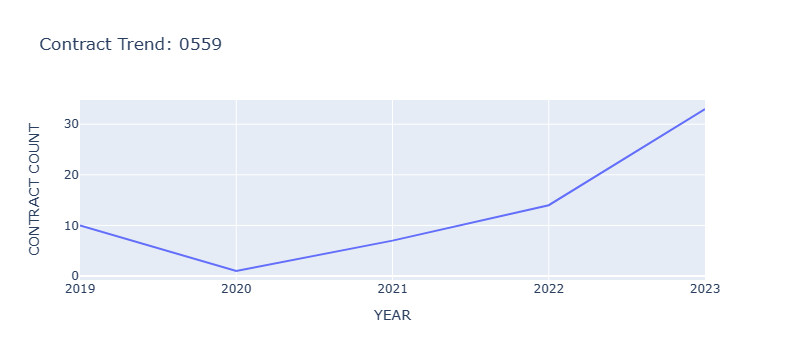

In [78]:
plot_yearly_trend(test1, "0559")